In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#import lib and data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from scipy import stats
from datetime import datetime, date

#drop unnecessary variables

##dataframe 1

In [3]:
df_1 = pd.read_excel("/content/drive/MyDrive/Customer_Info.xlsx")

In [4]:
df_1.head()

,CUSTOMER_ID,FULL_NAME,DOB,ONBOARDING_BRANCH_ID,ONBOARDING_BRANCH_NAME,NRC,FATHER_NAME,ADDRESS,ONBOARDING_TIME,ACCOUNT_STATUS,MARTIAL_STATUS
0,21249,ZEYAR NYUNT,1974-05-28,2,Ygn(41)_Novotel,12/BHATAHTA(N)000656,U NYUNT WIN MAUNG,"NO.(43/1),INYA MYAING ST,GOLDEN VALLEY (2),BAH...",2015-06-30,Close,Unknown
1,21258,KHIN MAUNG OO,1961-08-07,2,Ygn (1) Hlaing,KMYT002089,U THAUNG LWIN,- - SANCHAUNG YANGON(WEST) YANGON,2012-01-16,Close,Unknown
2,21434,SANJIV KUMAR,1966-10-11,2,Ygn(26)_KTD,12/KATATA(N)007899,U RAM ASRAY,"NO.43(B), 31ST,GROUND FLOOR, PABEDAN YANGON(W...",2017-09-14,Normal,Unknown
3,21438,WIN MIN THANT,1984-02-15,2,Mdy (9) 26 x 80 St,09/MAKHANA(N)182581,U THANT ZIN,ZA WA WA(205);HTAN TAPIN QTR;AHMARAPURA TSP;MD...,2020-08-27,Normal,Unknown
4,21441,MARLAR WIN,1975-10-16,2,Ygn(41)_Novotel,12/THAHGAKA(N)042538,U HLA WIN,"NO(65)B(1), MINDAMA HOUSING, MINDAMA ST, MAYAN...",2015-06-05,Close,Unknown


In [5]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115848 entries, 0 to 115847
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   CUSTOMER_ID             115848 non-null  int64         
 1   FULL_NAME               115848 non-null  object        
 2   DOB                     112793 non-null  datetime64[ns]
 3   ONBOARDING_BRANCH_ID    115848 non-null  int64         
 4   ONBOARDING_BRANCH_NAME  115848 non-null  object        
 5   NRC                     115848 non-null  object        
 6   FATHER_NAME             115072 non-null  object        
 7   ADDRESS                 115689 non-null  object        
 8   ONBOARDING_TIME         115848 non-null  datetime64[ns]
 9   ACCOUNT_STATUS          115848 non-null  object        
 10  MARTIAL_STATUS          115848 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 9.7+ MB


In [6]:
df_1.nunique().sort_values()

ACCOUNT_STATUS                3
MARTIAL_STATUS                5
ONBOARDING_BRANCH_NAME      252
ONBOARDING_BRANCH_ID        262
ONBOARDING_TIME            2209
DOB                       17254
FATHER_NAME               18643
FULL_NAME                 38306
ADDRESS                   83299
NRC                       84688
CUSTOMER_ID               84689
dtype: int64

In [7]:
df_1.drop(columns = ['FULL_NAME'], axis = 1, inplace=True)
df_1.drop(columns = ['FATHER_NAME'], axis = 1, inplace=True)
df_1.drop(columns = ['ADDRESS'], axis = 1, inplace=True)
df_1.drop(columns = ['NRC'], axis = 1, inplace=True)
df_1.drop(columns = ['ONBOARDING_TIME'], axis = 1, inplace=True)
df_1 = df_1.rename(columns={'CUSTOMER_ID': 'CUSTOMERID'})
df_1.drop_duplicates(subset = ['CUSTOMERID'], keep='last', inplace=True)

In [8]:
df_1 = df_1.dropna()
df_1['DOB'] = df_1['DOB'].astype(str)

In [9]:
def age(born):
    born = datetime.strptime(born, "%Y-%m-%d").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
  
df_1['Age'] = df_1['DOB'].apply(age)

df_1.drop(columns = ["DOB"], inplace = True)

In [10]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82335 entries, 0 to 115847
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CUSTOMERID              82335 non-null  int64 
 1   ONBOARDING_BRANCH_ID    82335 non-null  int64 
 2   ONBOARDING_BRANCH_NAME  82335 non-null  object
 3   ACCOUNT_STATUS          82335 non-null  object
 4   MARTIAL_STATUS          82335 non-null  object
 5   Age                     82335 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 4.4+ MB


In [11]:
df_1.head()

,CUSTOMERID,ONBOARDING_BRANCH_ID,ONBOARDING_BRANCH_NAME,ACCOUNT_STATUS,MARTIAL_STATUS,Age
0,21249,2,Ygn(41)_Novotel,Close,Unknown,49
1,21258,2,Ygn (1) Hlaing,Close,Unknown,61
2,21434,2,Ygn(26)_KTD,Normal,Unknown,56
3,21438,2,Mdy (9) 26 x 80 St,Normal,Unknown,39
4,21441,2,Ygn(41)_Novotel,Close,Unknown,47


In [12]:
df_1.shape

(82335, 6)

In [13]:
df_1.isnull().values.any()

False

In [14]:
lb_make = LabelEncoder()
df_1["ONBOARDING_BRANCH_NAME"] = lb_make.fit_transform(df_1["ONBOARDING_BRANCH_NAME"])
df_1["MARTIAL_STATUS"] = lb_make.fit_transform(df_1["MARTIAL_STATUS"])
df_1["ACCOUNT_STATUS"] = lb_make.fit_transform(df_1["ACCOUNT_STATUS"])

In [15]:
df_1.head()

,CUSTOMERID,ONBOARDING_BRANCH_ID,ONBOARDING_BRANCH_NAME,ACCOUNT_STATUS,MARTIAL_STATUS,Age
0,21249,2,194,0,3,49
1,21258,2,164,0,3,61
2,21434,2,180,1,3,56
3,21438,2,66,1,3,39
4,21441,2,194,0,3,47


In [16]:
df_1.describe()

,CUSTOMERID,ONBOARDING_BRANCH_ID,ONBOARDING_BRANCH_NAME,ACCOUNT_STATUS,MARTIAL_STATUS,Age
count,8.233500e+04,82335.000000,82335.000000,82335.000000,82335.000000,82335.000000
mean,7.943962e+05,164.423417,110.605915,0.183154,2.793223,42.200012
std,7.234610e+05,918.841078,62.737835,0.386952,0.548835,13.063364
min,5.298000e+03,1.000000,0.000000,0.000000,0.000000,3.000000
25%,2.371005e+05,14.000000,61.000000,0.000000,3.000000,33.000000
50%,4.793160e+05,35.000000,113.000000,0.000000,3.000000,40.000000
75%,1.233588e+06,86.000000,164.000000,0.000000,3.000000,50.000000
max,2.888622e+06,8002.000000,251.000000,2.000000,4.000000,123.000000


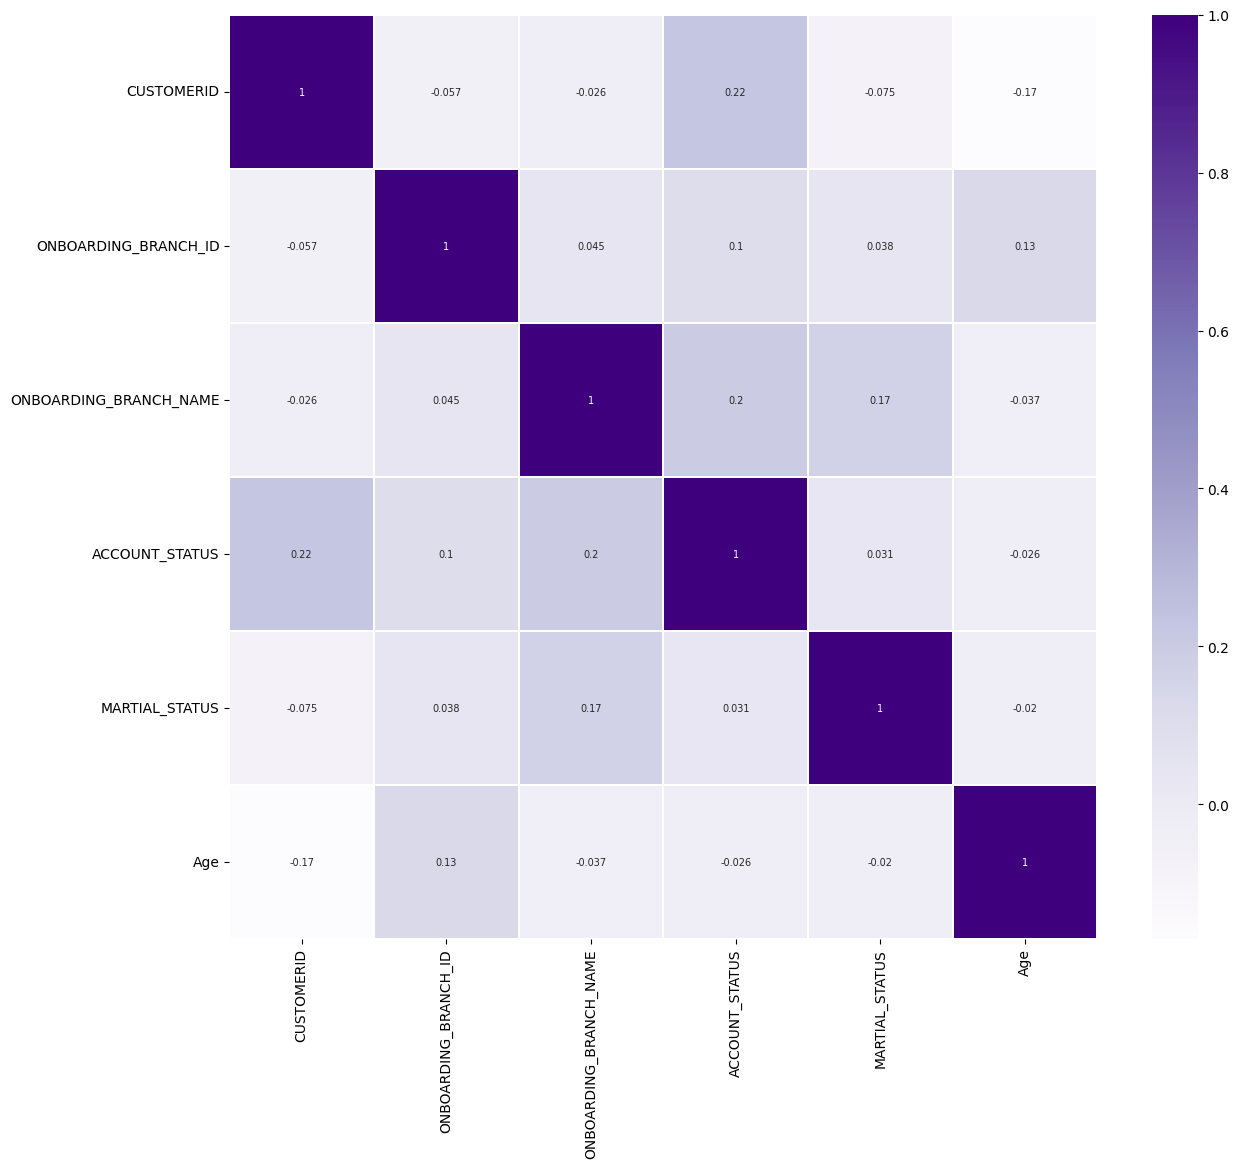

In [17]:
plt.figure(figsize=(14,12))
sns.heatmap(df_1.corr(),linewidths=.1,cmap="Purples", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);

##dataframe 2


In [18]:
df_2 = pd.read_excel("/content/drive/MyDrive/Customer_account_transaction_history.xlsx")

In [19]:
df_2.head()

,CUSTOMERID,TXDT,DEBIT_ACCOUNT_ID,CREDIT_ACCOUNT_ID,BALANCE,CURRENCY_CODE,DESCRIPTION
0,865172,2020-05-04 07:53:39,NaN,112708010754947,0.0,MMK,Repayment interest: From 0112330010002663 to: ...
1,171703,2020-05-04 09:49:10,NaN,136702010817033,0.0,MMK,payment for
2,9562,2020-05-04 13:04:27,NaN,112702010821366,0.0,MMK,N TO PYONE/Int
3,9562,2020-05-04 13:15:03,NaN,112702010821366,0.0,MMK,N TO G1 Disel
4,9562,2020-05-04 13:59:01,NaN,112702010821366,0.0,MMK,N TO YU INT+ Su


In [20]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323717 entries, 0 to 323716
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CUSTOMERID         323717 non-null  int64         
 1   TXDT               323717 non-null  datetime64[ns]
 2   DEBIT_ACCOUNT_ID   195536 non-null  float64       
 3   CREDIT_ACCOUNT_ID  323717 non-null  int64         
 4   BALANCE            323717 non-null  float64       
 5   CURRENCY_CODE      323717 non-null  object        
 6   DESCRIPTION        323709 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 17.3+ MB


In [21]:
df_2.nunique().sort_values()

CURRENCY_CODE             1
BALANCE               17693
DEBIT_ACCOUNT_ID      25911
CUSTOMERID            30091
CREDIT_ACCOUNT_ID     36274
DESCRIPTION           90642
TXDT                 180911
dtype: int64

In [22]:
df_2.drop(columns = ['CURRENCY_CODE'], axis = 1, inplace=True)
df_2.drop(columns = ['DESCRIPTION'], axis = 1, inplace=True)
df_2.drop(columns = ['DEBIT_ACCOUNT_ID'], axis = 1, inplace=True)
df_2.drop(columns = ['TXDT'], axis = 1, inplace=True)
df_2.drop(columns = ['CREDIT_ACCOUNT_ID'], axis = 1, inplace=True)
df_2.drop_duplicates(subset = ['CUSTOMERID'], keep=False, inplace=True)

In [23]:
df_2.shape

(2942, 2)

In [24]:
df_2.isnull().values.any()

False

##dataframe 3

In [25]:
df_3 = pd.read_excel("/content/drive/MyDrive/Loan_information.xlsx")

In [26]:
df_3.head()

,Debit ACNO,CREDIT_ACNO,CUSTOMERID,CUSTOMER_TYPE,CATEGORYID,CATNAME,CRD_PURPOSE,CRD_CLASSIFICATION,CRLIMIT,DISBURSEMENT_AMT,...,WEEK_DEBIT,WEEK_CREDIT,MONTH_DEBIT,MONTH_CREDIT,QUATER_DEBIT,QUATER_CREDIT,SEMI_ANNUAL_DEBIT,SEMI_ANNUAL_CREDIT,YEAR_DEBIT,YEAR_CREDIT
0,1.121010e+12,1801010612245,1256754,Single Customer,1067,Hire Purchase (Upfront Method) Int 7%,Electronic Equipments,Agriculture/Livestocks,413700.0,413700.0,...,413700.0,275859.87,413700.0,275859.87,413700.0,275859.87,413700.0,275859.87,413700.0,275859.87
1,1.121010e+12,1801010612261,1617517,Single Customer,1067,Hire Purchase (Upfront Method) Int 7%,Electronic Equipments,Agriculture/Livestocks,595000.0,595000.0,...,595000.0,396710.20,595000.0,396710.20,595000.0,396710.20,595000.0,396710.20,595000.0,396710.20
2,1.121010e+12,1801010614829,1308040,Single Customer,1067,Hire Purchase (Upfront Method) Int 7%,Electronic Equipments,Agriculture/Livestocks,560000.0,560000.0,...,560000.0,373562.65,560000.0,373562.65,560000.0,373562.65,560000.0,373562.65,560000.0,373562.65
3,1.121010e+12,1801010630319,1384971,Single Customer,1067,Hire Purchase (Upfront Method) Int 7%,Electronic Equipments,Agriculture/Livestocks,559300.0,559300.0,...,559300.0,356425.47,559300.0,356425.47,559300.0,356425.47,559300.0,356425.47,559300.0,356425.47
4,1.121010e+12,1801010630322,1660930,Single Customer,1067,Hire Purchase (Upfront Method) Int 7%,Electronic Equipments,Agriculture/Livestocks,707000.0,707000.0,...,707000.0,450115.05,707000.0,450115.05,707000.0,450115.05,707000.0,450115.05,707000.0,450115.05


In [27]:
df_3.shape

(15005, 57)

In [28]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15005 entries, 0 to 15004
Data columns (total 57 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Debit ACNO                      14945 non-null  float64       
 1   CREDIT_ACNO                     15005 non-null  int64         
 2   CUSTOMERID                      15005 non-null  int64         
 3   CUSTOMER_TYPE                   15005 non-null  object        
 4   CATEGORYID                      15005 non-null  int64         
 5   CATNAME                         15005 non-null  object        
 6   CRD_PURPOSE                     15005 non-null  object        
 7   CRD_CLASSIFICATION              15005 non-null  object        
 8   CRLIMIT                         15005 non-null  float64       
 9   DISBURSEMENT_AMT                15005 non-null  float64       
 10  NORMAL_PRINCIPAL_AMT            15005 non-null  float64       
 11  PR

In [29]:
df_3.nunique().sort_values()

CLSDT                                 0
CRD_CLASSIFICATION                    1
ASDATE                                1
CUSTOMER_TYPE                         3
NPL_STATUS                            5
CRD_PURPOSE                           9
Down_payment%                        20
CATNAME                              28
CATEGORYID                           29
FIRSTDAY_OF_INTEREST_PAYMENT         31
PRINCIPAL_PAY_DAY                    31
TIMES                                36
BRNAME                              206
DEALER_NAME                         258
VEXPRIREDATE                        323
NPL_DAYS                            424
MIN_DUEDT                           692
MIN_NPL_DAYS                        692
INTEREST_PREPAID                    772
OPNDT                               868
FIRSTDATE_OF_PRINCIPAL_PAYMENT      905
FIRSTDATE_OF_INTEREST_PAYMENT       939
END_OF_TENOR                       2165
Down payment amount                2997
ORIGINAL_AMT                       5289


In [30]:
# NPL_S = df_3.pop("NPL_STATUS")
# df_3 = df_3.insert(0, "NPL_STATUS", NPL_S)

In [31]:
df_3.drop_duplicates(subset = ['CUSTOMERID'], keep=False, inplace=True)

In [32]:
df_3['NPL_STATUS'].unique()

array(['Bad Debt', 'Doubtful', 'Sub-Standard', 'Standard', 'Watch'],
      dtype=object)

In [33]:
df_3['NPL_STATUS'] = df_3['NPL_STATUS'].map({'Bad Debt' :0 , 'Doubtful':0, 'Sub-Standard' :0, 'Standard':1, 'Watch':1})

In [34]:
df_3 = df_3.apply(LabelEncoder().fit_transform)

In [35]:
df_3.drop(columns = ['ASDATE'], axis = 1, inplace=True)
df_3.drop(columns = ['CRD_CLASSIFICATION'], axis = 1, inplace=True)
df_3.drop(columns = ['CLSDT'], axis = 1, inplace=True)

In [36]:
# Create correlation matrix
corr_matrix = df_3.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
df_3.drop(df_3[to_drop], axis=1)

<ipython-input-36-a63e6867b5a5>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


,Debit ACNO,CUSTOMERID,CUSTOMER_TYPE,CATEGORYID,CATNAME,CRD_PURPOSE,CRLIMIT,PRINCIPAL_AMT,FIRSTDATE_OF_PRINCIPAL_PAYMENT,PRINCIPAL_PAY_DAY,DUE_AMT_OF_PRINCIPAL,NRC_NO,PHONE,DEALER_NAME,ADDRESS,NPL_DAYS,LAST_REPAYMENT_AMOUNT,VEXPRIREDATE,OPNDT,Down_payment%
0,1,8023,2,17,26,3,205,827,154,8,1131,784,2124,234,236,393,30,279,228,5
1,2,9023,2,17,26,3,294,1123,154,8,1357,12495,4267,234,12638,393,25,279,228,5
2,3,8165,2,17,26,3,278,1072,157,15,1317,8545,8298,234,1993,384,1872,276,426,5
3,5,8379,2,17,26,3,277,1034,171,14,1379,5523,14304,234,13046,384,2470,277,400,5
4,4,9151,2,17,26,3,338,1260,171,14,1564,10701,3959,234,509,392,70,277,400,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15000,14506,9065,2,19,10,7,4078,8731,670,7,0,7546,2902,171,10222,2,8719,0,766,0
15001,14509,9320,2,21,10,7,4467,3716,867,6,0,9497,4708,38,3160,3,8947,0,536,3
15002,14511,940,2,19,10,7,713,0,855,18,2696,8680,4205,211,11715,0,12231,0,506,17
15003,14511,5204,2,19,10,7,1110,0,862,27,2272,8205,6919,211,6933,0,12231,0,761,13


In [37]:
# plt.figure(figsize=(22,16))
# sns.heatmap(df_3.corr(),linewidths=.1,cmap="Purples", annot=True, annot_kws={"size": 10})
# plt.yticks(rotation=0);

In [38]:
#NPL_S = df_3.pop('NPL_STATUS') # xóa phần tử
#df_3.insert(0, 'NPL_STATUS', NPL_S)

In [39]:
df_3.head()

,Debit ACNO,CREDIT_ACNO,CUSTOMERID,CUSTOMER_TYPE,CATEGORYID,CATNAME,CRD_PURPOSE,CRLIMIT,DISBURSEMENT_AMT,NORMAL_PRINCIPAL_AMT,...,WEEK_DEBIT,WEEK_CREDIT,MONTH_DEBIT,MONTH_CREDIT,QUATER_DEBIT,QUATER_CREDIT,SEMI_ANNUAL_DEBIT,SEMI_ANNUAL_CREDIT,YEAR_DEBIT,YEAR_CREDIT
0,1,0,8023,2,17,26,3,205,205,486,...,205,827,205,827,205,827,205,827,205,827
1,2,1,9023,2,17,26,3,294,295,689,...,295,1123,295,1123,295,1123,295,1123,295,1123
2,3,2,8165,2,17,26,3,278,278,660,...,278,1072,278,1072,278,1072,278,1072,278,1072
3,5,3,8379,2,17,26,3,277,277,700,...,277,1034,277,1034,277,1034,277,1034,277,1034
4,4,4,9151,2,17,26,3,338,339,816,...,339,1260,339,1260,339,1260,339,1260,339,1260


<ipython-input-40-e4c03ff37d96>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x, bins = bins, kde = use_kde)
<ipython-input-40-e4c03ff37d96>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x, bins = bins, kde = use_kde)
<ipython-input-40-e4c03ff37d96>:6: UserWarning: 

`distplot` i

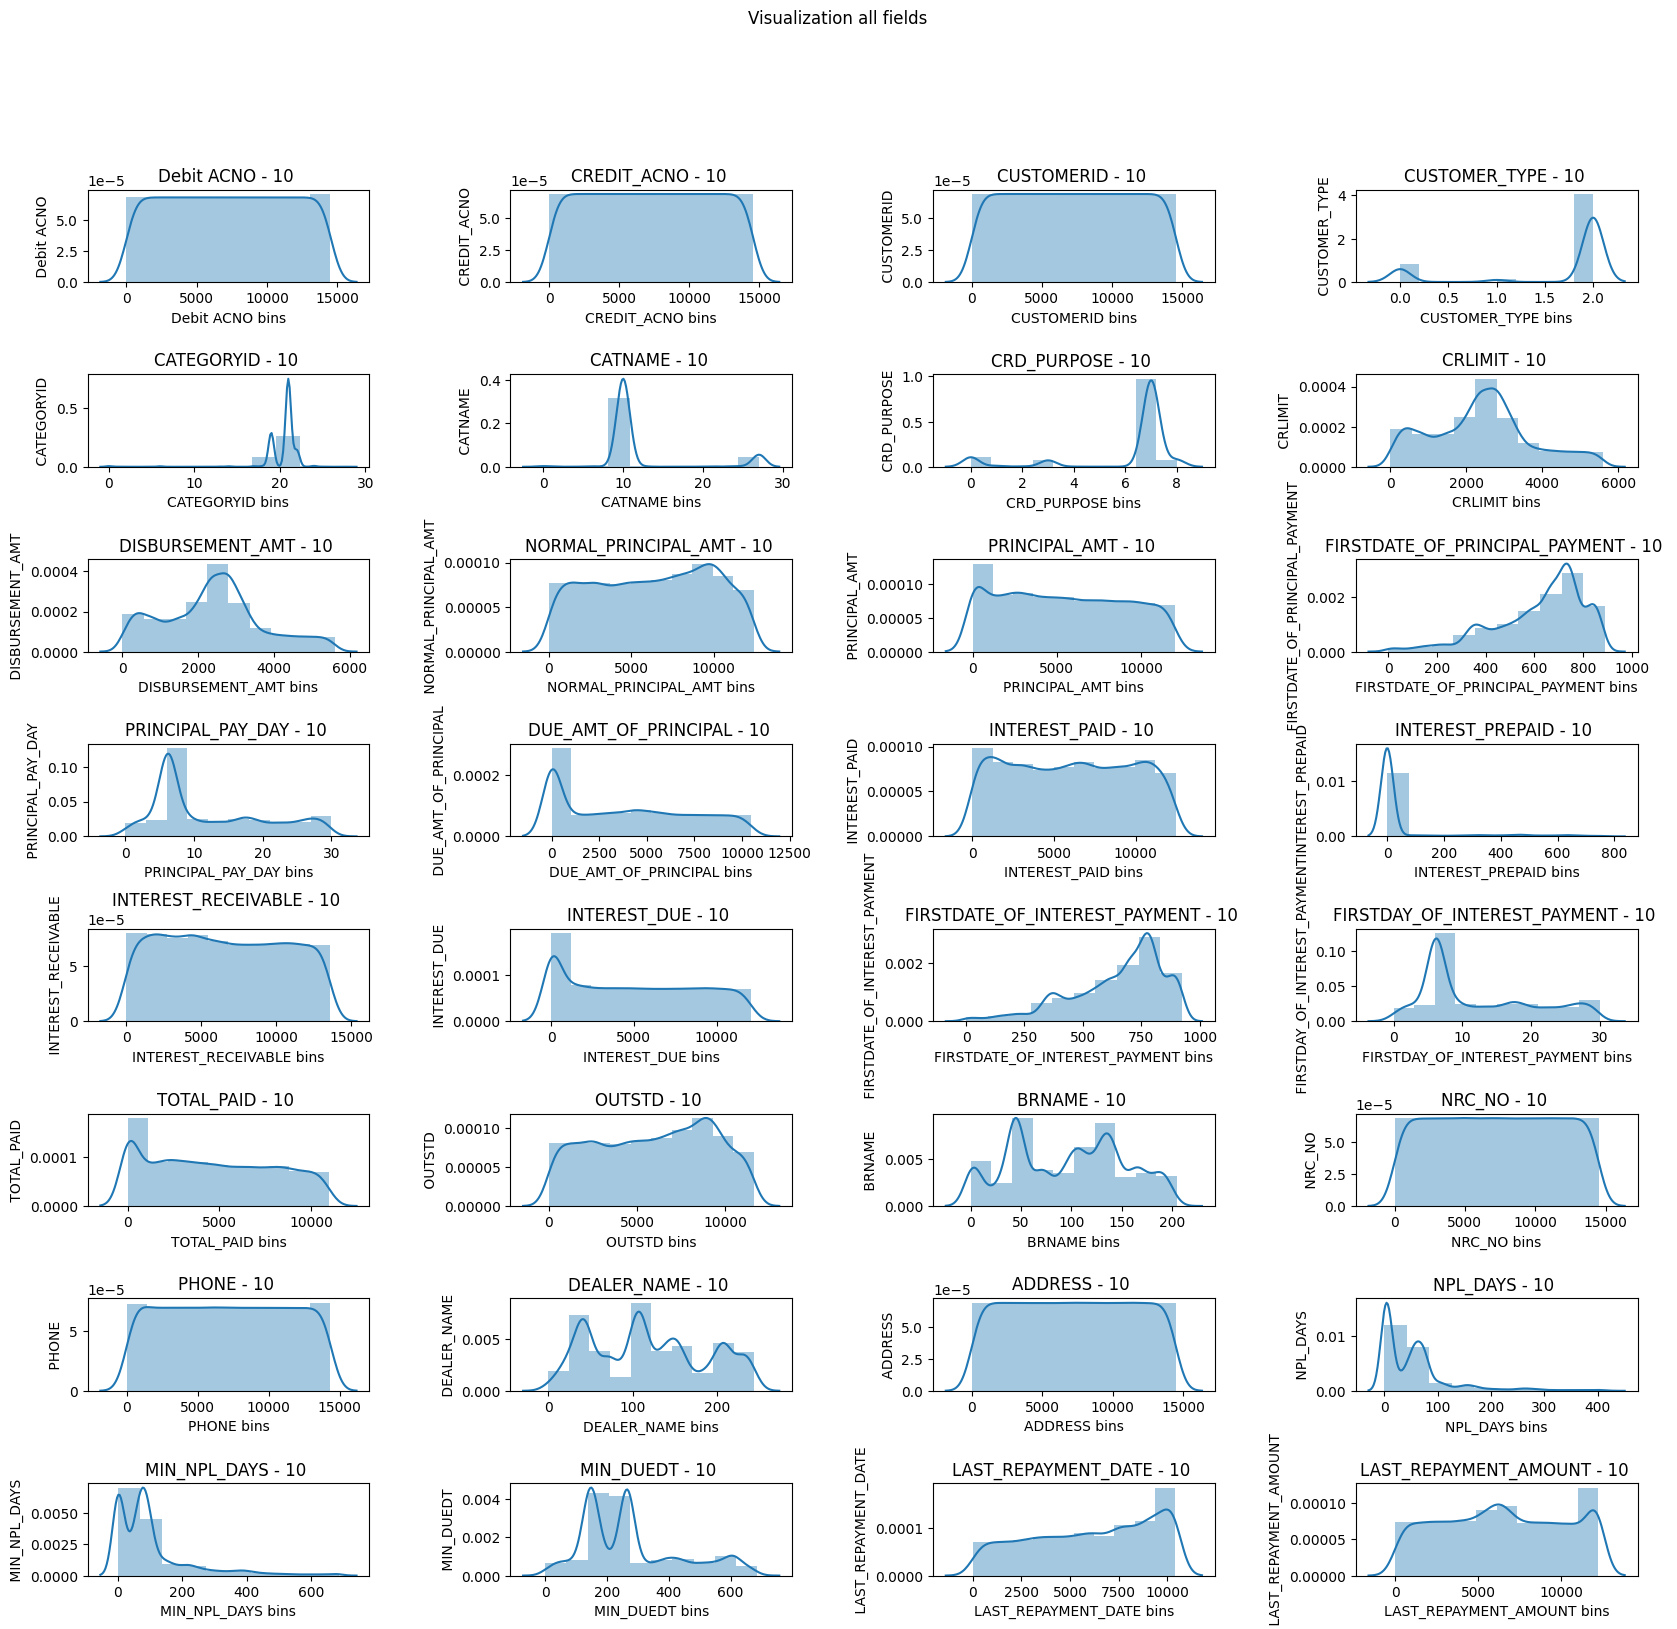

In [40]:
def _plot_hist_subplot(x, fieldname, bins = 10, use_kde = True):
  x = x.dropna()
  xlabel = '{} bins'.format(fieldname)
  ylabel = ' {} '.format(fieldname)
  title = '{} - {} '.format(fieldname, bins)
  ax = sns.distplot(x, bins = bins, kde = use_kde)
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  ax.set_title(title)
  return ax

# Biểu đồ barchart
def _plot_barchart_subplot(x, fieldname):
  xlabel = '{}'.format(fieldname)
  ylabel = '{} '.format(fieldname)
  title = '{}'.format(fieldname)
  x = x.fillna('Missing')
  df_summary = x.value_counts(dropna = False)
  y_values = df_summary.values
  x_index = df_summary.index
  ax = sns.barplot(x = x_index, y = y_values, order = x_index)
  # Tạo vòng for lấy tọa độ đỉnh trên cùng của biểu đồ và thêm label thông qua annotate.
  labels = list(set(x))
  for label, p in zip(y_values, ax.patches):
    ax.annotate(label, (p.get_x()+0.25, p.get_height()+0.15))
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  return ax

# Khởi tạo figure cho đồ thị (Kích thước W*H = 16x12) và cách nhau là 0.2 giữa các đồ thị
fig = plt.figure(figsize=(20, 18))
fig.subplots_adjust(hspace=1, wspace=0.5)
# Tạo vòng for check định dạng của biến và visualize
for i, (fieldname, dtype) in enumerate(zip(df_3.columns, df_3.dtypes.values)):
  if i <= 31:
    ax_i = fig.add_subplot(8, 4, i+1)
    if dtype in ['float64', 'int64']:
      ax_i = _plot_hist_subplot(df_3[fieldname], fieldname=fieldname)
    else:
      ax_i = _plot_barchart_subplot(df_3[fieldname], fieldname=fieldname)
 
      
fig.suptitle('Visualization all fields')
plt.show()

In [41]:
df = df_3

In [42]:
df.to_csv("data_clear.csv", sep='\t', encoding='utf-8') # tạo 1 tệp csv 

#Tính toán WOE cho từng biến

Hàm bin_table() bên dưới sẽ có tác dụng phân chia các nhóm bins và thống kê số lượng các quan sát, số lượng good và bad ở mỗi nhóm.

In [43]:
MAX_VAL = 999999999
MIN_VAL = -MAX_VAL

def bin_table(data, colname, n_bins = 10, qcut = None):
  X = data[[colname, 'NPL_STATUS']]
  X = X.sort_values(colname)
  coltype = X[colname].dtype

  if coltype in ['float', 'int']:
    if qcut is None:
      try:
        bins, thres = pd.qcut(X[colname], q = n_bins, retbins=True, duplicates='drop')
        # Thay thế threshold đầu và cuối của thres
        thres[0] = MIN_VAL
        thres[-1] = MAX_VAL
        bins, thres = pd.cut(X[colname], bins=thres, retbins=True)
        X['bins'] = bins
      except:
        print('n_bins must be lower to bin interval is valid!')
    else:
      bins, thres = pd.cut(X[colname], bins=qcut, retbins=True)
      X['bins'] = bins
  elif coltype == 'object':
    X['bins'] = X[colname]

  df_GB = pd.pivot_table(X, 
                index = ['bins'],
                values = ['NPL_STATUS'],
                columns = ['NPL_STATUS'],
                aggfunc = {
                    'NPL_STATUS':np.size
                })

  df_Count = pd.pivot_table(X, 
                index = ['bins'],
                values = ['NPL_STATUS'],
                aggfunc = {
                    'NPL_STATUS': np.size
                })
  
  if coltype in ['float', 'int']:
    df_Thres = pd.DataFrame({'Thres':thres[1:]}, index=df_GB.index)
  elif coltype == 'object':
    df_Thres = pd.DataFrame(index=df_GB.index)
    thres = None
  df_Count.columns = ['No_Obs']
  df_GB.columns = ['#BAD', '#GOOD']
  df_summary = df_Thres.join(df_Count).join(df_GB)
  return df_summary, thres


#WOE

In [44]:
def WOE(data, colname, n_bins = None, min_obs = 100, qcut = None):
  # Thống kê bins và lấy ra thres hold ban đầu
  df_summary, thres = bin_table(data, colname, n_bins = n_bins, qcut = qcut)
  # Thay thế giá trị 0 của #BAD trong df_summary bằng 1 để không bị lỗi chia cho 0
  df_summary['#BAD'] = df_summary['#BAD'].replace({0:1})
  
  if qcut is not None:
    # Lọc bỏ threshold để tạo thành threshold mới mà thỏa mãn số lượng quan sát >= min_obs
    exclude_ind = np.where(df_summary['No_Obs'] <= min_obs)[0]
    if exclude_ind.shape[0] > 0:
      new_thres = np.delete(thres, exclude_ind)
      print('Auto combine {} bins into {} bins'.format(n_bins, new_thres.shape[0]-1))
      # Tính toán lại bảng summary
      df_summary, thres = bin_table(data, colname, qcut=new_thres)
  
  new_thres = thres
  df_summary['GOOD/BAD'] = df_summary['#GOOD']/df_summary['#BAD']
  df_summary['%BAD'] = df_summary['#BAD']/df_summary['#BAD'].sum()
  df_summary['%GOOD'] = df_summary['#GOOD']/df_summary['#GOOD'].sum()
  df_summary['WOE'] = np.log(df_summary['%GOOD']/df_summary['%BAD'])
  df_summary['IV'] = (df_summary['%GOOD']-df_summary['%BAD'])*df_summary['WOE']
  df_summary['COLUMN'] = colname
  IV = df_summary['IV'].sum()
  print('Information Value of {} column: {}'.format(colname, IV))
  return df_summary, IV, new_thres

df_summary, IV, thres = WOE(df, 'Debit ACNO', n_bins = 7, min_obs= 100)
df_summary

Information Value of Debit ACNO column: 0.02864741663323109


,Thres,No_Obs,#BAD,#GOOD,GOOD/BAD,%BAD,%GOOD,WOE,IV,COLUMN
bins,,,,,,,,,,
"(-999999999.0, 2081.286]",2.081286e+03,2082,1377,705,0.511983,0.149951,0.130871,-0.136099,0.002597,Debit ACNO
"(2081.286, 4162.571]",4.162571e+03,2081,1351,730,0.540340,0.147120,0.135511,-0.082190,0.000954,Debit ACNO
"(4162.571, 6243.857]",6.243857e+03,2081,1251,830,0.663469,0.136230,0.154075,0.123092,0.002197,Debit ACNO
"(6243.857, 8325.143]",8.325143e+03,2082,1291,791,0.612703,0.140586,0.146835,0.043491,0.000272,Debit ACNO
"(8325.143, 10406.429]",1.040643e+04,2081,1277,804,0.629601,0.139061,0.149248,0.070696,0.000720,Debit ACNO
"(10406.429, 12487.714]",1.248771e+04,2081,1451,630,0.434183,0.158009,0.116948,-0.300923,0.012356,Debit ACNO
"(12487.714, 999999999.0]",1.000000e+09,2082,1185,897,0.756962,0.129043,0.166512,0.254923,0.009552,Debit ACNO


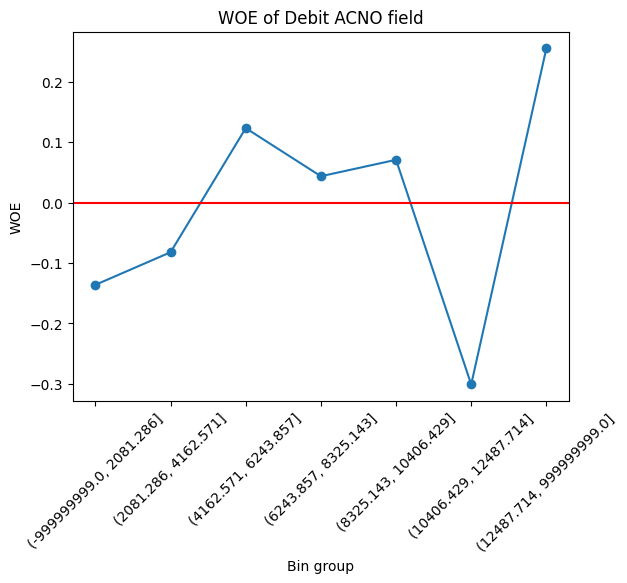

In [45]:
def _plot(df_summary):
  colname = list(df_summary['COLUMN'].unique())[0]
  df_summary['WOE'].plot(linestyle='-', marker='o')
  plt.title('WOE of {} field'.format(colname))
  plt.axhline(y=0, color = 'red')
  plt.xticks(rotation=45)
  plt.ylabel('WOE')
  plt.xlabel('Bin group')

_plot(df_summary)

In [46]:
df.columns

Index(['Debit ACNO', 'CREDIT_ACNO', 'CUSTOMERID', 'CUSTOMER_TYPE',
       'CATEGORYID', 'CATNAME', 'CRD_PURPOSE', 'CRLIMIT', 'DISBURSEMENT_AMT',
       'NORMAL_PRINCIPAL_AMT', 'PRINCIPAL_AMT',
       'FIRSTDATE_OF_PRINCIPAL_PAYMENT', 'PRINCIPAL_PAY_DAY',
       'DUE_AMT_OF_PRINCIPAL', 'INTEREST_PAID', 'INTEREST_PREPAID',
       'INTEREST_RECEIVABLE', 'INTEREST_DUE', 'FIRSTDATE_OF_INTEREST_PAYMENT',
       'FIRSTDAY_OF_INTEREST_PAYMENT', 'TOTAL_PAID', 'OUTSTD', 'BRNAME',
       'NRC_NO', 'PHONE', 'DEALER_NAME', 'ADDRESS', 'NPL_DAYS', 'MIN_NPL_DAYS',
       'MIN_DUEDT', 'LAST_REPAYMENT_DATE', 'LAST_REPAYMENT_AMOUNT',
       'NPL_STATUS', 'PRINTAMT', 'INTEREST', 'PI', 'TIMES', 'FEE_OUTSTANDING',
       'VEXPRIREDATE', 'OPNDT', 'ORIGINAL_AMT', 'Down_payment%',
       'Down payment amount', 'END_OF_TENOR', 'WEEK_DEBIT', 'WEEK_CREDIT',
       'MONTH_DEBIT', 'MONTH_CREDIT', 'QUATER_DEBIT', 'QUATER_CREDIT',
       'SEMI_ANNUAL_DEBIT', 'SEMI_ANNUAL_CREDIT', 'YEAR_DEBIT', 'YEAR_CREDIT'],
      d

In [47]:
df.describe()
#DISBURSEMENT_AMT

,Debit ACNO,CREDIT_ACNO,CUSTOMERID,CUSTOMER_TYPE,CATEGORYID,CATNAME,CRD_PURPOSE,CRLIMIT,DISBURSEMENT_AMT,NORMAL_PRINCIPAL_AMT,...,WEEK_DEBIT,WEEK_CREDIT,MONTH_DEBIT,MONTH_CREDIT,QUATER_DEBIT,QUATER_CREDIT,SEMI_ANNUAL_DEBIT,SEMI_ANNUAL_CREDIT,YEAR_DEBIT,YEAR_CREDIT
count,14570.000000,14570.000000,14570.000000,14570.000000,14570.000000,14570.000000,14570.000000,14570.000000,14570.000000,14570.000000,...,14570.000000,14570.000000,14570.000000,14570.000000,14570.000000,14570.000000,14570.000000,14570.000000,14570.000000,14570.000000
mean,7284.382567,7284.500000,7284.500000,1.650309,20.405765,12.073988,6.154358,2396.176458,2397.944749,6313.218874,...,2397.944749,5461.637406,2397.944749,5461.637406,2397.944749,5461.637406,2397.944749,5461.637406,2397.944749,5461.637406
std,4205.938722,4206.141046,4206.141046,0.742562,2.208737,5.698479,2.209618,1311.022595,1311.369224,3535.686166,...,1311.369224,3611.936903,1311.369224,3611.936903,1311.369224,3611.936903,1311.369224,3611.936903,1311.369224,3611.936903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3642.250000,3642.250000,3642.250000,2.000000,19.000000,10.000000,7.000000,1471.250000,1473.250000,3214.250000,...,1473.250000,2311.000000,1473.250000,2311.000000,1473.250000,2311.000000,1473.250000,2311.000000,1473.250000,2311.000000
50%,7284.500000,7284.500000,7284.500000,2.000000,21.000000,10.000000,7.000000,2404.000000,2406.000000,6499.500000,...,2406.000000,5307.500000,2406.000000,5307.500000,2406.000000,5307.500000,2406.000000,5307.500000,2406.000000,5307.500000
75%,10926.750000,10926.750000,10926.750000,2.000000,21.000000,10.000000,7.000000,3097.000000,3099.000000,9405.750000,...,3099.000000,8563.750000,3099.000000,8563.750000,3099.000000,8563.750000,3099.000000,8563.750000,3099.000000,8563.750000
max,14511.000000,14569.000000,14569.000000,2.000000,28.000000,27.000000,8.000000,5596.000000,5598.000000,12422.000000,...,5598.000000,12032.000000,5598.000000,12032.000000,5598.000000,12032.000000,5598.000000,12032.000000,5598.000000,12032.000000


In [48]:
df = df.drop(columns = ['CUSTOMERID'])

In [49]:
df = df.drop(columns = ['NPL_DAYS'])
df = df.drop(columns = ['LAST_REPAYMENT_DATE'])
df = df.drop(columns = ['INTEREST'])
# df = df.drop(columns = ['FEE_OUTSTANDING'])
# df = df.drop(columns = ['PI'])
# df = df.drop(columns = ['DUE_AMT_OF_PRINCIPAL'])
df = df.drop(columns = ['CREDIT_ACNO'])
df = df.drop(columns = ['FIRSTDATE_OF_PRINCIPAL_PAYMENT'])
df = df.drop(columns = ['PRINCIPAL_PAY_DAY'])
df = df.drop(columns = ['PHONE'])
df = df.drop(columns = ['OPNDT'])
df = df.drop(columns = ['ADDRESS'])
df = df.drop(columns = ['Down payment amount'])
df = df.drop(columns = ['CUSTOMER_TYPE'])
df = df.drop(columns = ['VEXPRIREDATE'])
df = df.drop(columns = ['DISBURSEMENT_AMT'])


In [50]:
df.columns

Index(['Debit ACNO', 'CATEGORYID', 'CATNAME', 'CRD_PURPOSE', 'CRLIMIT',
       'NORMAL_PRINCIPAL_AMT', 'PRINCIPAL_AMT', 'DUE_AMT_OF_PRINCIPAL',
       'INTEREST_PAID', 'INTEREST_PREPAID', 'INTEREST_RECEIVABLE',
       'INTEREST_DUE', 'FIRSTDATE_OF_INTEREST_PAYMENT',
       'FIRSTDAY_OF_INTEREST_PAYMENT', 'TOTAL_PAID', 'OUTSTD', 'BRNAME',
       'NRC_NO', 'DEALER_NAME', 'MIN_NPL_DAYS', 'MIN_DUEDT',
       'LAST_REPAYMENT_AMOUNT', 'NPL_STATUS', 'PRINTAMT', 'PI', 'TIMES',
       'FEE_OUTSTANDING', 'ORIGINAL_AMT', 'Down_payment%', 'END_OF_TENOR',
       'WEEK_DEBIT', 'WEEK_CREDIT', 'MONTH_DEBIT', 'MONTH_CREDIT',
       'QUATER_DEBIT', 'QUATER_CREDIT', 'SEMI_ANNUAL_DEBIT',
       'SEMI_ANNUAL_CREDIT', 'YEAR_DEBIT', 'YEAR_CREDIT'],
      dtype='object')

Tính toán giá trị WOE cho toàn bộ các biến.

In [51]:
WOE_dict=dict()
nbins = {'Debit ACNO':10, 'CATEGORYID':10,
       'CATNAME':10, 'CRD_PURPOSE':10, 'CRLIMIT':10, 'NORMAL_PRINCIPAL_AMT':10,
       'PRINCIPAL_AMT':10, 
       'DUE_AMT_OF_PRINCIPAL':10, 'INTEREST_PAID':10, 'INTEREST_RECEIVABLE':10,
       'TOTAL_PAID':10, 'NRC_NO':10,  'DEALER_NAME':10, 
        'LAST_REPAYMENT_AMOUNT':10, 'PI':10,
       'FEE_OUTSTANDING':10, 'ORIGINAL_AMT':10,
       'Down_payment%':10}
for (col, bins) in nbins.items():
  df_summary, IV, thres = WOE(df, colname=col, n_bins=bins)
  WOE_dict[col] = {'table':df_summary, 'IV':IV}
  # _plot(df_summary)

Information Value of Debit ACNO column: 0.026092446128000133
Information Value of CATEGORYID column: 0.10729428272298547
Information Value of CATNAME column: 0.02424317016384571
Information Value of CRD_PURPOSE column: 0.026792195904614808
Information Value of CRLIMIT column: 0.07821087578164988
Information Value of NORMAL_PRINCIPAL_AMT column: 0.11543477589394918
Information Value of PRINCIPAL_AMT column: 0.10684284744371636
Information Value of DUE_AMT_OF_PRINCIPAL column: 4.389338971843989
Information Value of INTEREST_PAID column: 0.06045392623119077
Information Value of INTEREST_RECEIVABLE column: 2.7479168159167298
Information Value of TOTAL_PAID column: 0.03679311480138101
Information Value of NRC_NO column: 0.04914991626275393
Information Value of DEALER_NAME column: 0.03556562091603642
Information Value of LAST_REPAYMENT_AMOUNT column: 0.11438682576600173
Information Value of PI column: 4.623953651080782
Information Value of FEE_OUTSTANDING column: 6.2749618967995895
Informati

In [52]:
dff= df[['Debit ACNO', 'CATEGORYID',
       'CATNAME', 'CRD_PURPOSE', 'CRLIMIT', 'NORMAL_PRINCIPAL_AMT',
       'PRINCIPAL_AMT', 
       'DUE_AMT_OF_PRINCIPAL', 'INTEREST_PAID', 'INTEREST_RECEIVABLE',
       'TOTAL_PAID', 'NRC_NO',  'DEALER_NAME', 
        'LAST_REPAYMENT_AMOUNT', 'PI',
       'FEE_OUTSTANDING', 'ORIGINAL_AMT',
       'Down_payment%']]

**Xếp hạng các biến theo sức mạnh dự báo**

Dựa trên giá trị IV đã tính toán ở bước trước, ta sẽ xếp hạng các biến này như bên dưới.

In [53]:

columns = []
IVs = []
for col in dff.columns:
  if col != 'NPL_STATUS':
    columns.append(col)
    IVs.append(WOE_dict[col]['IV'])
df_WOE = pd.DataFrame({'column': columns, 'IV': IVs})

def _rank_IV(iv):
  if iv <= 0.02:
    return 'Useless'
  elif iv <= 0.1:
    return 'Weak'
  elif iv <= 0.3:
    return 'Medium'
  elif iv <= 0.5:
    return 'Strong'
  else:
    return 'Suspicious'
df_WOE['rank']=df_WOE['IV'].apply(lambda x: _rank_IV(x))
df_WOE.sort_values('IV', ascending=False)


,column,IV,rank
15,FEE_OUTSTANDING,6.274962,Suspicious
14,PI,4.623954,Suspicious
7,DUE_AMT_OF_PRINCIPAL,4.389339,Suspicious
9,INTEREST_RECEIVABLE,2.747917,Suspicious
5,NORMAL_PRINCIPAL_AMT,0.115435,Medium
13,LAST_REPAYMENT_AMOUNT,0.114387,Medium
1,CATEGORYID,0.107294,Medium
6,PRINCIPAL_AMT,0.106843,Medium
4,CRLIMIT,0.078211,Weak
16,ORIGINAL_AMT,0.075095,Weak


**Hồi qui logistic**

Phương trình hồi qui logistic trong credit scorecard sẽ không hồi qui trực tiếp trên các biến gốc mà thay vào đó giá trị WOE ở từng biến sẽ được sử dụng thay thế để làm đầu vào. Ta sẽ tính toán các biến WOE bằng cách map mỗi khoảng bin tương ứng với giá trị WOE của nó như sau:

In [54]:
for col in WOE_dict.keys():
  try:
    key = list(WOE_dict[col]['table']['WOE'].index)
    woe = list(WOE_dict[col]['table']['WOE'])
    d = dict(zip(key, woe))
    col_woe = col+'_WOE'
    df[col_woe] = df[col].map(d)
  except:
    print(col)

Gán giá trị input là các biến WOE và biến mục tiêu là 'NPL_STATUS'.

In [55]:
X = df.filter(like='_WOE', axis = 1)
# can delete some useless variables (total_day_calls,total_night_calls...)
y = df['NPL_STATUS']

#model: Logistics Regression


Phân chia tập huấn luyện/kiểm tra có tỷ lệ kích thước mẫu là 80:20. Tỷ lệ của GOOD/BAD là cân bằng trên cả tập huấn luyện và kiểm tra.

In [56]:
ids = np.arange(X.shape[0])
X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(X, y, ids, test_size = 0.2, stratify = y, shuffle = True, random_state = 123)

print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (11656, 18)
X_test shape:  (2914, 18)
y_train shape:  (11656,)
y_test shape:  (2914,)


In [57]:
logit_model = LogisticRegression(solver = 'lbfgs', max_iter=1000, fit_intercept=True, tol=0.0001, C=1, penalty='l2')
logit_model.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=1000)

In [58]:
y_pred_train = logit_model.predict(X_train)
acc_train = accuracy_score(y_pred_train, y_train)
y_pred_test = logit_model.predict(X_test)
acc_test = accuracy_score(y_pred_test, y_test)

print('accuracy on train: ', acc_train)
print('accuracy on test: ', acc_test)

accuracy on train:  0.9418325326012355
accuracy on test:  0.9454358270418668


#Đường cong ROC trên tập test



<ipython-input-59-350c01ed0e1f>:7: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
<ipython-input-59-350c01ed0e1f>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


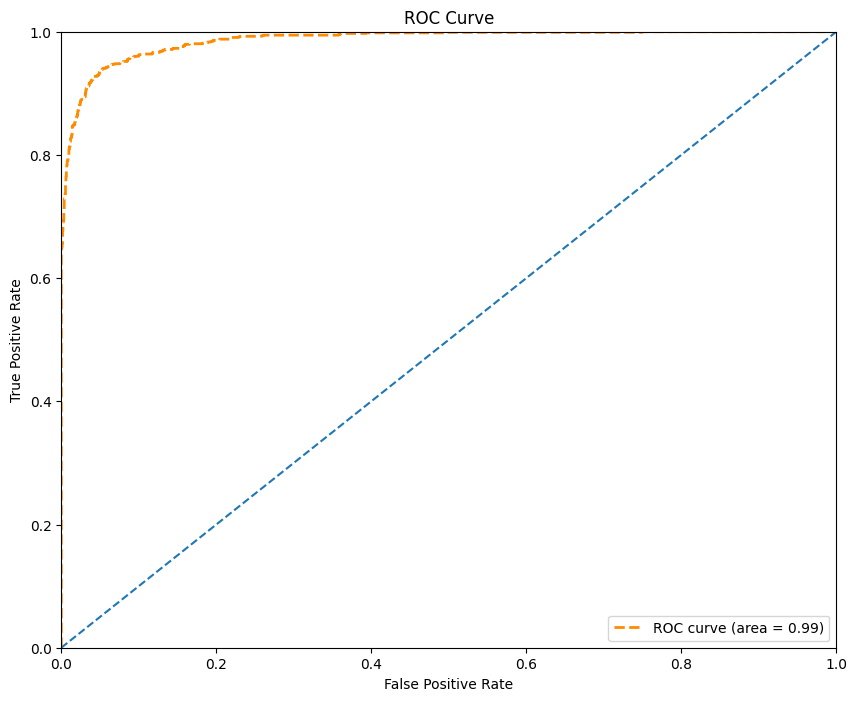

In [59]:
y_pred_prob_test = logit_model.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

def _plot_roc_curve(fpr, tpr, thres, auc):
    plt.figure(figsize = (10, 8))
    plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.title('ROC Curve')

_plot_roc_curve(fpr, tpr, thres, roc_auc)

#Đường cong precision và recall trên tập test

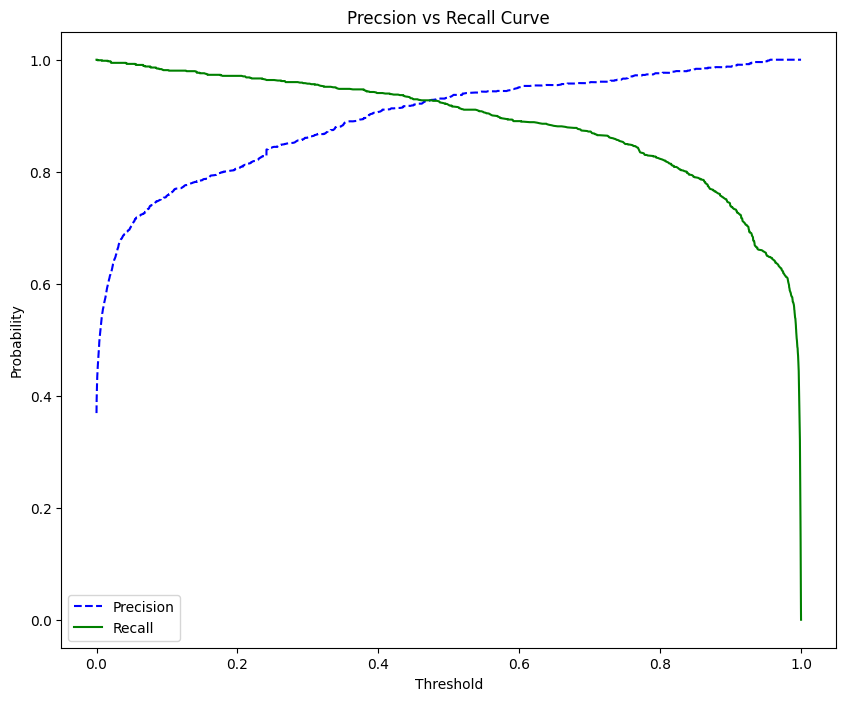

In [60]:
precision, recall, thres = precision_recall_curve(y_test, y_pred_prob_test)

def _plot_prec_rec_curve(prec, rec, thres):
    plt.figure(figsize = (10, 8))
    plt.plot(thres, prec[:-1], 'b--', label = 'Precision')
    plt.plot(thres, rec[:-1], 'g-', label = 'Recall')
    plt.xlabel('Threshold')
    plt.ylabel('Probability')
    plt.title('Precsion vs Recall Curve')
    plt.legend()

_plot_prec_rec_curve(precision, recall, thres)

In [61]:
def _KM(y_pred, n_bins):
  _, thresholds = pd.qcut(y_pred, q=n_bins, retbins=True)
  cmd_BAD = []
  cmd_GOOD = []
  BAD_id = set(np.where(y_test == 0)[0])
  GOOD_id = set(np.where(y_test == 1)[0])
  total_BAD = len(BAD_id)
  total_GOOD = len(GOOD_id)
  for thres in thresholds:
    pred_id = set(np.where(y_pred <= thres)[0])
    # Đếm % số lượng hồ sơ BAD có xác suất dự báo nhỏ hơn hoặc bằng thres
    per_BAD = len(pred_id.intersection(BAD_id))/total_BAD
    cmd_BAD.append(per_BAD)
    # Đếm % số lượng hồ sơ GOOD có xác suất dự báo nhỏ hơn hoặc bằng thres
    per_GOOD = len(pred_id.intersection(GOOD_id))/total_GOOD
    cmd_GOOD.append(per_GOOD)
  cmd_BAD = np.array(cmd_BAD)
  cmd_GOOD = np.array(cmd_GOOD)
  return cmd_BAD, cmd_GOOD, thresholds

cmd_BAD, cmd_GOOD, thresholds = _KM(y_pred_prob_test, n_bins=20)

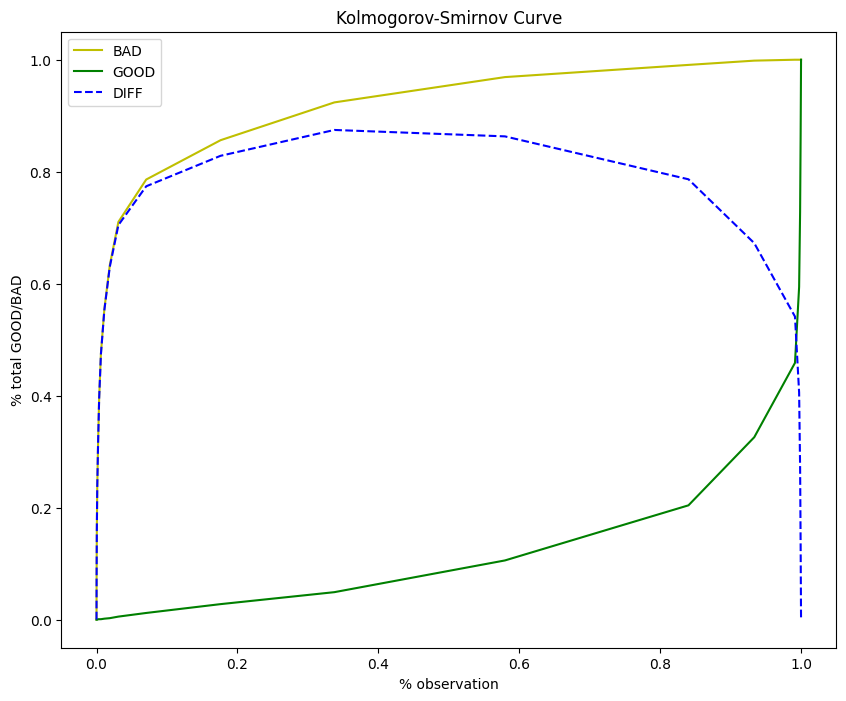

In [62]:
def _plot_KM(cmd_BAD, cmd_GOOD, thresholds):
  plt.figure(figsize = (10, 8))
  plt.plot(thresholds, cmd_BAD, 'y-', label = 'BAD')
  plt.plot(thresholds, cmd_GOOD, 'g-', label = 'GOOD')
  plt.plot(thresholds, cmd_BAD-cmd_GOOD, 'b--', label = 'DIFF')
  plt.xlabel('% observation')
  plt.ylabel('% total GOOD/BAD')
  plt.title('Kolmogorov-Smirnov Curve')
  plt.legend()

_plot_KM(cmd_BAD, cmd_GOOD, thresholds)

In [63]:
stats.ks_2samp(cmd_BAD, cmd_GOOD)

KstestResult(statistic=0.5714285714285714, pvalue=0.0016567962353134283, statistic_location=0.04921077065923862, statistic_sign=-1)

#Tính điểm credit score cho mỗi feature

In [64]:
def _CreditScore(beta, alpha, woe, n = 12, odds = 1/4, pdo = -50, thres_score = 600):
  factor = pdo/np.log(2)
  offset = thres_score - factor*np.log(odds)
  score = (beta*woe+alpha/n)*factor+offset/n
  return score

_CreditScore(beta = 0.5, alpha = -1, woe = 0.15, n = 12)

42.2677896003704

In [65]:
betas_dict = dict(zip(list(X_train.columns), logit_model.coef_[0]))
alpha = logit_model.intercept_[0]
betas_dict

{'Debit ACNO_WOE': 0.20271602847544154,
 'CATEGORYID_WOE': 0.4337697930882586,
 'CATNAME_WOE': -3.5662927216464624,
 'CRD_PURPOSE_WOE': 0.8725302045818759,
 'CRLIMIT_WOE': -3.3110938653508115,
 'NORMAL_PRINCIPAL_AMT_WOE': -0.037635465698334335,
 'PRINCIPAL_AMT_WOE': 0.3040990271298694,
 'DUE_AMT_OF_PRINCIPAL_WOE': 0.1671286521503233,
 'INTEREST_PAID_WOE': -0.39390647869487866,
 'INTEREST_RECEIVABLE_WOE': 0.1865244021171859,
 'TOTAL_PAID_WOE': 0.6190795743312032,
 'NRC_NO_WOE': 0.8797958362120291,
 'DEALER_NAME_WOE': 0.4353806225988301,
 'LAST_REPAYMENT_AMOUNT_WOE': 1.7379240629174286,
 'PI_WOE': 0.8352899234071743,
 'FEE_OUTSTANDING_WOE': 0.661739819640646,
 'ORIGINAL_AMT_WOE': -1.9419321127432194,
 'Down_payment%_WOE': -0.7053095046327345}

In [66]:
cols = []
features = []
woes = []
betas = []
scores = []

for col in columns:
  for feature, woe in WOE_dict[col]['table']['WOE'].to_frame().iterrows():
      cols.append(col)
      # Add feature
      feature = str(feature)
      features.append(feature)    
      # Add woe
      woe = woe.values[0]
      woes.append(woe)
      # Add beta
      col_woe = col+'_WOE'
      beta = betas_dict[col_woe]
      betas.append(beta)
      # Add score
      score = _CreditScore(beta = beta, alpha = alpha, woe = woe, n = 12)
      scores.append(score)

df_WOE = pd.DataFrame({'Columns': cols, 'Features': features, 'WOE': woes, 'Betas':betas, 'Scores':scores})
df_WOE.head()

,Columns,Features,WOE,Betas,Scores
0,Debit ACNO,"(-999999999.0, 1456.9]",-0.100641,0.202716,42.303621
1,Debit ACNO,"(1456.9, 2913.8]",-0.252897,0.202716,44.530031
2,Debit ACNO,"(2913.8, 4370.7]",0.024370,0.202716,40.475604
3,Debit ACNO,"(4370.7, 5827.6]",0.117021,0.202716,39.120770
4,Debit ACNO,"(5827.6, 7284.5]",-0.002062,0.202716,40.862112


In [67]:
# test
test_obs = df[columns].iloc[0:1, :]
test_obs

,Debit ACNO,CATEGORYID,CATNAME,CRD_PURPOSE,CRLIMIT,NORMAL_PRINCIPAL_AMT,PRINCIPAL_AMT,DUE_AMT_OF_PRINCIPAL,INTEREST_PAID,INTEREST_RECEIVABLE,TOTAL_PAID,NRC_NO,DEALER_NAME,LAST_REPAYMENT_AMOUNT,PI,FEE_OUTSTANDING,ORIGINAL_AMT,Down_payment%
0,1,17,26,3,205,486,827,1131,753,2152,815,784,234,30,1150,7577,203,5


In [68]:
def _search_score(obs, col):
  feature = [str(inter) for inter in list(WOE_dict[col]['table'].index) if obs[col].values[0] in inter][0]
  score = df_WOE[(df_WOE['Columns'] == col) & (df_WOE['Features'] == feature)]['Scores'].values[0]
  return score

def _total_score(obs, columns = columns):
  scores = dict()
  for col in columns:
    scores[col] = _search_score(obs, col)
  total_score = sum(scores.values())
  return scores, total_score

scores, total_score = _total_score(test_obs)

print(_total_score(test_obs))

({'Debit ACNO': 42.30362078544716, 'CATEGORYID': 34.15676930298839, 'CATNAME': 139.3879889555998, 'CRD_PURPOSE': 41.75324052024341, 'CRLIMIT': 162.64970979881699, 'NORMAL_PRINCIPAL_AMT': 42.08981548106718, 'PRINCIPAL_AMT': 34.794044381696686, 'DUE_AMT_OF_PRINCIPAL': 34.352172838023606, 'INTEREST_PAID': 39.42505847830217, 'INTEREST_RECEIVABLE': 12.000771296135795, 'TOTAL_PAID': 50.07607852522297, 'NRC_NO': 63.707665609060484, 'DEALER_NAME': 39.72179412477952, 'LAST_REPAYMENT_AMOUNT': 71.33792672685951, 'PI': -6.521215113233467, 'FEE_OUTSTANDING': 257.8970893502447, 'ORIGINAL_AMT': 112.66178914954995, 'Down_payment%': 42.86590398589056}, 1214.6602241966955)


In [89]:
total_scores = []
data_test = df.iloc[id_test].copy()
for i in np.arange(data_test[columns].shape[0]):
  obs = data_test[columns].iloc[i:(i+1), :]
  _, score = _total_score(obs)
  total_scores.append(score)

data_test['Score'] = total_scores

In [90]:
print( total_scores)

[805.3799504656203, 1492.1168569832969, 910.5443836757448, 1261.341206824915, 1099.2021169310535, 391.82582545142975, 187.63366710714138, 1346.2691399225798, 470.19674543578515, 1058.8007759207553, 1129.0920340832688, 453.7896639433616, 926.7283161151626, 1205.3808577425052, 894.5250459839558, 112.82991529303284, 990.2977649844509, 1097.3439522129147, 177.662822808567, 218.03394022934714, 832.2813350726765, 248.00812705634863, 951.2723536029179, 827.6663508470126, 182.4638572898331, 263.5030573177814, 291.5466760288476, 1003.7333252594034, 1090.629681448707, 219.72078283125126, 921.1840160145416, 1130.9973342493531, 553.1964299277149, 536.2364870469304, 823.4391717416327, 1017.0584544180388, 255.42778454544904, 1156.7263960863302, 1113.3073282065398, 1000.7280731410607, 591.1623047858398, 1048.8339774533017, 897.9713965820268, 1069.0851801395663, 1297.3968592614044, 1445.6504054668615, 345.46634958243493, 778.4698784436221, 1300.3016468608212, 1198.3065749041534, 759.3923938063048, 732

In [95]:
rounded_data = []
for num in total_scores:
    rounded_num = round(num)
    rounded_data.append(rounded_num)

print(rounded_data)

[805, 1492, 911, 1261, 1099, 392, 188, 1346, 470, 1059, 1129, 454, 927, 1205, 895, 113, 990, 1097, 178, 218, 832, 248, 951, 828, 182, 264, 292, 1004, 1091, 220, 921, 1131, 553, 536, 823, 1017, 255, 1157, 1113, 1001, 591, 1049, 898, 1069, 1297, 1446, 345, 778, 1300, 1198, 759, 732, 1204, 1467, 576, 139, 239, 587, 1015, 704, 110, 373, 399, 1026, 1027, 950, 1190, 187, 818, 1026, 1189, 551, 875, 1135, 1032, 1241, 1031, 854, 1196, 1296, 658, 717, 798, 1177, 783, 1255, 1022, 634, 966, 1050, 893, 699, 333, 207, 1166, 716, 625, 1130, 1233, 273, 957, 745, 1294, 1205, 237, 997, 1098, 1244, 1255, 887, 1309, 246, 873, 800, 1146, 1178, 409, 343, 405, 1517, 840, 1132, 1338, 1445, 1313, 820, 605, 580, 499, 356, 797, 790, 199, 248, 997, 952, 133, 1063, 386, 1192, 1015, 489, 221, 675, 859, 944, 1410, 171, 867, 1153, 1118, 1056, 1017, 1331, 1119, 1102, 701, 226, 309, 1193, 864, 1164, 1407, 327, 994, 715, 612, 1062, 749, 1396, 809, 239, 668, 260, 977, 1015, 1282, 287, 255, 958, 1225, 1335, 926, 1293, 120

In [96]:
data_test.head(5)

,Debit ACNO,CATEGORYID,CATNAME,CRD_PURPOSE,CRLIMIT,NORMAL_PRINCIPAL_AMT,PRINCIPAL_AMT,DUE_AMT_OF_PRINCIPAL,INTEREST_PAID,INTEREST_PREPAID,...,INTEREST_RECEIVABLE_WOE,TOTAL_PAID_WOE,NRC_NO_WOE,DEALER_NAME_WOE,LAST_REPAYMENT_AMOUNT_WOE,PI_WOE,FEE_OUTSTANDING_WOE,ORIGINAL_AMT_WOE,Down_payment%_WOE,Score
9388,8980,21,10,7,945,2327,6896,2644,8168,0,...,0.230452,0.094038,0.252886,0.035349,-0.158753,0.785900,-0.558851,0.039946,0.311933,805.379950
3174,3211,21,10,7,3163,10376,0,9394,274,0,...,-3.142232,-0.207002,0.165511,0.007083,-0.854646,-5.137894,-6.750083,-0.272950,-0.078894,1492.116857
7250,6937,22,27,8,575,1342,2339,2066,1595,596,...,0.230452,-0.362625,0.252886,0.007083,-0.243338,0.785900,-0.558851,0.286407,0.234569,910.544384
11873,11424,19,10,7,810,2580,2002,5850,1822,0,...,-0.951950,0.125635,0.165511,0.007083,-0.052500,-2.843226,-4.547349,0.286407,0.039977,1261.341207
6442,6180,21,10,7,2924,9471,3318,5395,4283,0,...,-3.171106,-0.362625,0.210761,0.035146,0.000481,-2.843226,-3.328767,0.150996,-0.181796,1099.202117


In [98]:
data_test["Score Adjusted"]=rounded_data

<ipython-input-71-05f965899c95>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_test['Score'])


Text(0.5, 1.0, 'Distribution Score of Total data')

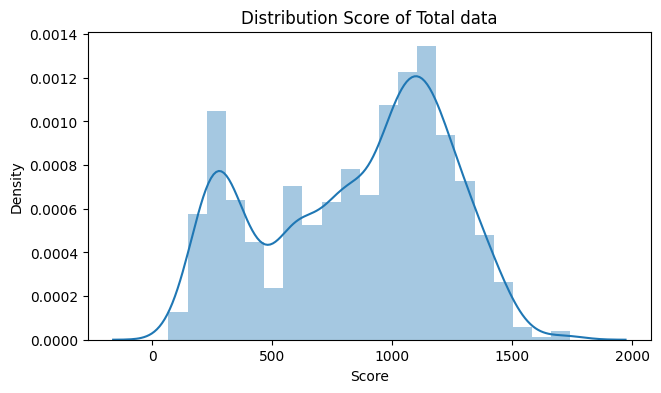

In [71]:
plt.figure(figsize=(16, 4))
plt.subplot(121)
sns.distplot(data_test['Score'])
plt.title('Distribution Score of Total data')

<ipython-input-72-0ac2c3ed7d55>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_test['Score'])
<ipython-input-72-0ac2c3ed7d55>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_test[data_test['NPL_STATUS']==1]['Score'], label='Default')
<ipython-input-72-0ac2c3ed7d55>:7: UserWarning: 


Text(0.5, 1.0, 'Distribution Score in Default vs Non-Default')

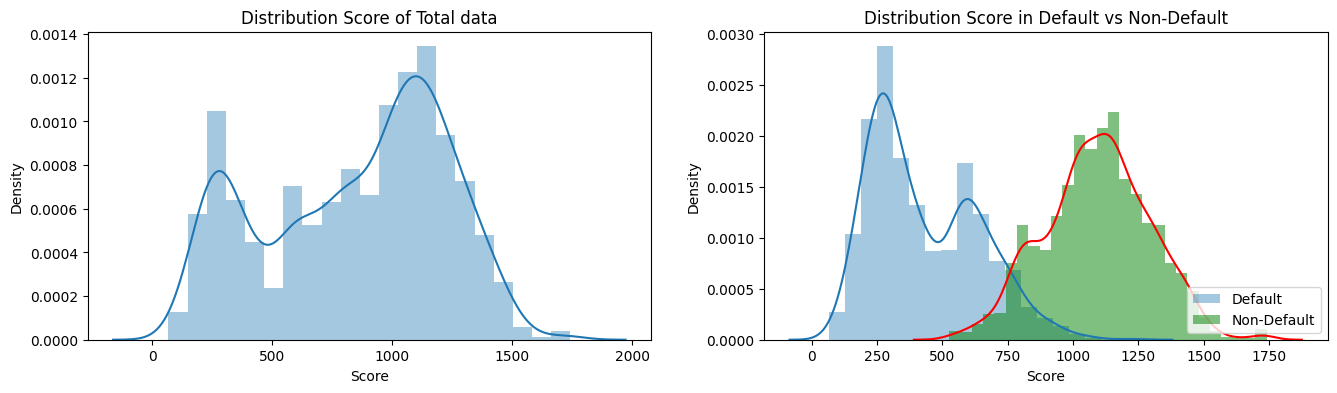

In [72]:
plt.figure(figsize=(16, 4))
plt.subplot(121)
sns.distplot(data_test['Score'])
plt.title('Distribution Score of Total data')
plt.subplot(122)
sns.distplot(data_test[data_test['NPL_STATUS']==1]['Score'], label='Default')
sns.distplot(data_test[data_test['NPL_STATUS']==0]['Score'], label='Non-Default', 
             kde_kws={"color": "r"}, 
             hist_kws={"color": "g", "alpha":0.5})
plt.legend(loc = 'lower right')
plt.title('Distribution Score in Default vs Non-Default')

## Phân loại khách hàng 

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [99]:
data_test.head(5)

,Debit ACNO,CATEGORYID,CATNAME,CRD_PURPOSE,CRLIMIT,NORMAL_PRINCIPAL_AMT,PRINCIPAL_AMT,DUE_AMT_OF_PRINCIPAL,INTEREST_PAID,INTEREST_PREPAID,...,TOTAL_PAID_WOE,NRC_NO_WOE,DEALER_NAME_WOE,LAST_REPAYMENT_AMOUNT_WOE,PI_WOE,FEE_OUTSTANDING_WOE,ORIGINAL_AMT_WOE,Down_payment%_WOE,Score,Score Adjusted
9388,8980,21,10,7,945,2327,6896,2644,8168,0,...,0.094038,0.252886,0.035349,-0.158753,0.785900,-0.558851,0.039946,0.311933,805.379950,805
3174,3211,21,10,7,3163,10376,0,9394,274,0,...,-0.207002,0.165511,0.007083,-0.854646,-5.137894,-6.750083,-0.272950,-0.078894,1492.116857,1492
7250,6937,22,27,8,575,1342,2339,2066,1595,596,...,-0.362625,0.252886,0.007083,-0.243338,0.785900,-0.558851,0.286407,0.234569,910.544384,911
11873,11424,19,10,7,810,2580,2002,5850,1822,0,...,0.125635,0.165511,0.007083,-0.052500,-2.843226,-4.547349,0.286407,0.039977,1261.341207,1261
6442,6180,21,10,7,2924,9471,3318,5395,4283,0,...,-0.362625,0.210761,0.035146,0.000481,-2.843226,-3.328767,0.150996,-0.181796,1099.202117,1099


In [102]:


# Định nghĩa ngưỡng phân loại
nguong_very_poor = 579
nguong_fair = 669
nguong_good = 739
nguong_very_good = 799

# Phân loại khách hàng
def classify_credit_score(credit_score):
    if credit_score <= nguong_very_poor:
        return "Very Poor"
    elif credit_score <= nguong_fair:
        return "Fair"
    elif credit_score <= nguong_good:
        return "Good"
    elif credit_score <= nguong_very_good:
        return "Very Good"
    else:
        return "Exceptional"

data_test['Phân loại'] = data_test['Score Adjusted'].apply(classify_credit_score)

# In kết quả
print(data_test)


       Debit ACNO  CATEGORYID  CATNAME  CRD_PURPOSE  CRLIMIT  \
9388         8980          21       10            7      945   
3174         3211          21       10            7     3163   
7250         6937          22       27            8      575   
11873       11424          19       10            7      810   
6442         6180          21       10            7     2924   
...           ...         ...      ...          ...      ...   
12107       11659          21       10            7     4036   
5101         4868          21       10            7     1860   
487           475          21       10            7     2414   
12874       12420          19       10            7     3476   
4496         4386          21       10            7     5579   

       NORMAL_PRINCIPAL_AMT  PRINCIPAL_AMT  DUE_AMT_OF_PRINCIPAL  \
9388                   2327           6896                  2644   
3174                  10376              0                  9394   
7250                   1342

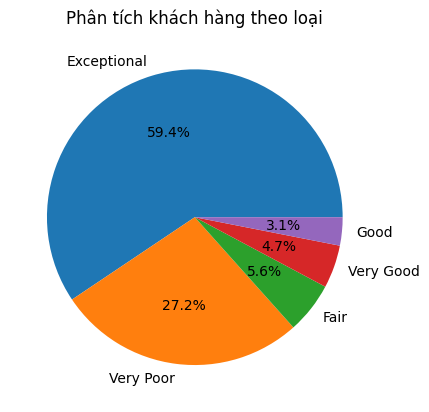

In [103]:
# Phân loại khách hàng và đếm số lượng trong mỗi nhóm
customer_counts = data_test['Phân loại'].value_counts()

# Vẽ biểu đồ tròn
plt.pie(customer_counts, labels=customer_counts.index, autopct='%1.1f%%')

# Đặt tiêu đề cho biểu đồ
plt.title('Phân tích khách hàng theo loại')

# Hiển thị biểu đồ
plt.show()

In [104]:
data_test.to_csv("output.csv", sep='\t', encoding='utf-8') # tạo 1 tệp csv 